In [1]:
import numpy, random, math
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs

In [2]:
def kernels(x, y, fun='linear', paras=1):
    if len(x)!=len(y):
        print('2 objects should be have same length!')
        return 0
    if fun=='poly':
        return (numpy.dot(x,y)+1)**paras
    if fun=='RBF':
        return numpy.exp(-numpy.dot(x-y,x-y)/(2*paras*paras))
    return numpy.dot(x,y)

In [3]:
def objective(alpha):
    # alpha is 1xn array or list
    if not isinstance(alpha, numpy.ndarray):
        alpha = numpy.array(alpha)
    return numpy.dot(alpha, numpy.dot(alpha, P))/2 - numpy.sum(alpha)

In [4]:
def zerofun(alpha):
    if not isinstance(alpha, numpy.ndarray):
        alpha = numpy.array(alpha)
    return numpy.dot(alpha, targets)

In [5]:
def extract_nonzeros():
    if C==None:
        return [inputs[(alpha>10**(-5)),:], 
                targets[(alpha>10**(-5))], 
                alpha[(alpha>10**(-5))]]
    else:
        return [inputs[(alpha>10**(-5))&(alpha<C-10**(-5)),:], 
                targets[(alpha>10**(-5))&(alpha<C-10**(-5))], 
                alpha[(alpha>10**(-5))&(alpha<C-10**(-5))]]

In [6]:
def find_b(index_sv):
    return numpy.dot(alpha*targets, 
              numpy.array([kernels(sv[0][index_sv,:],xi,fun,paras) for xi in inputs])) - sv[1][index_sv]

In [7]:
def indicator(s):
    return numpy.dot(alpha*targets, numpy.array([kernels(s,xi,fun,paras) for xi in inputs])) - b

In [193]:
# Generate Test Data
def dataset0(n1=10, n2=10, n3=10, pos1=[1.5,0.5], pos2=[-1.5,0.5], pos3=[0.0,-0.5], var1=0.2, var2=0.2, var3=0.2):
    classA = numpy.concatenate((numpy.random.randn(n1, 2) * var1 + pos1,
                               numpy.random.randn(n2, 2) * var2 + pos2))
    classB = numpy.random.randn(n3, 2) * var3 + pos3

    inputs = numpy.concatenate((classA, classB))
    targets = numpy.concatenate((numpy.ones(classA.shape[0]), -numpy.ones(classB.shape[0])))

    N = inputs.shape[0]

    permute = list(range(N))
    random.shuffle(permute)
    inputs = inputs[permute, :]
    targets = targets[permute]
    return inputs, targets, classA, classB

In [260]:
def datasetMoon(random_state=0):
    inputs, targets = make_moons(n_samples=100, noise=0.1)
    classA = inputs[targets==1]
    classB = inputs[targets==0]
    targets[targets==0] = -1
    return inputs, targets, classA, classB

In [167]:
def datasetCircle():
    inputs, targets = make_circles(n_samples=100, factor=0.5, noise=0.05)
    classA = inputs[targets==1]
    classB = inputs[targets==0]
    targets[targets==0] = -1
    return inputs, targets, classA, classB

In [253]:
def datasetClass():
    inputs, targets = make_classification(n_samples=100, n_features=2, n_redundant=0,
                                        n_informative=2, random_state=2,
                                        n_clusters_per_class=1)
    classA = inputs[targets==1]
    classB = inputs[targets==0]
    targets[targets==0] = -1
    return inputs, targets, classA, classB

In [44]:
def datasetBlobs():
    inputs, targets = make_blobs(n_samples=100, centers=[(-2.0, -2.0), (2.0, 2.0)], n_features=2)
    classA = inputs[targets==1]
    classB = inputs[targets==0]
    targets[targets==0] = -1
    return inputs, targets, classA, classB

In [55]:
def datasetFlame():
    d = numpy.loadtxt('flame.txt')
    inputs = d[:,[0,1]]/10 - [0.7, 2.0]
    targets = d[:, 2]
    
    classA = inputs[targets==1,:]
    classB = inputs[targets==2,:]
    
    targets[targets==2] = -1
    
    return inputs, targets, classA, classB

In [69]:
def datasetSpiral():
    d = numpy.loadtxt('spiral.txt')
    
    targets = d[:, 2]
    inputs = d[targets<3,:]
    targets = targets[targets<3]
    inputs = inputs[:,[0,1]]/10-[2.0,2.0]
    
    classA = inputs[targets==1,:]
    classB = inputs[targets==2,:]
    
    targets[targets==2] = -1
    
    return inputs, targets, classA, classB

In [114]:
def datasetPathbased():
    d = numpy.loadtxt('pathbased.txt')
    
    targets = d[:, 2]
    inputs = d[:,[0,1]]
    
    targets[targets==2] = -1
    targets[targets==3] = -1
    
    classA = inputs[targets==1,:]
    classB = inputs[targets==-1,:]
    
    return inputs, targets, classA, classB

In [150]:
numpy.random.seed(100)
inputs, targets, classA, classB = datasetSpiral()
#inputs, targets, classA, classB = dataset0(50, 50, 50 ,[0.7, 0.3], [-0.7, 0.3], [0.0, -0.2], 
#                                          var1=0.1, var2=0.1, var3=0.1)

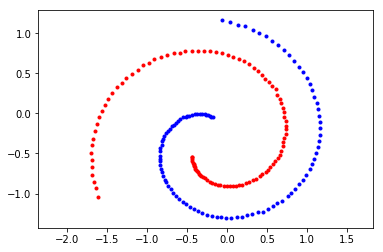

In [151]:
# Plotting
plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')

#plt.axis([-4.0, 2.0, -2.0, 2.0])
plt.axis('equal')
#plt.savefig('svmplot_spiral.pdf')
plt.show()

In [186]:
fun = 'poly'
paras = 3
C = 10
N = inputs.shape[0]
K = numpy.array([[kernels(xi, xj, fun, paras) for xi in inputs] for xj in inputs])

P = numpy.outer(targets,targets)*K

ret = minimize(objective, numpy.zeros(N), bounds=[(0,C) for b in range(N)], 
               constraints={'type':'eq', 'fun':zerofun})
alpha = ret['x']

sv = extract_nonzeros()
# alpha get from minimize strictly set C if is is over C
print(sv[2])
isv = 0
b = find_b(isv)

print(indicator([1.5, -0.5]))

[9.95346257 1.51630395 0.0400989  5.02406945 1.08348167 0.91713548
 4.99583899 9.53747873]
14.36346907485462


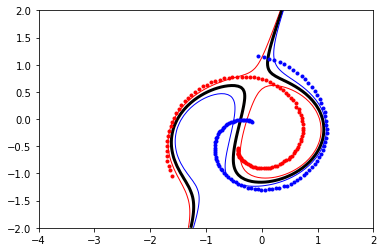

In [187]:
# Plotting the Decision Boundary
xgrid = numpy.linspace(-4, 2, 100)
ygrid = numpy.linspace(-2, 2, 100)

grid = numpy.array([[indicator([x, y]) for x in xgrid] for y in ygrid])

plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('red', 'black', 'blue'), linewidths=(1,3,1))
plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')
plt.savefig('svmclass_spiral_poly3_C10.pdf')
plt.show()